In [19]:
#!pip install Jinja2

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [21]:
df = pd.read_csv("../../data/preprocessed/turnsaal_warme_weather.csv",delimiter=',',encoding='UTF-8')

In [22]:
def timestamp_to_datetime(timestamp):
    return datetime.datetime.fromisoformat(timestamp)
    

In [23]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [24]:
df['day'] = [x.day for x in df['timestamp']]
df['month'] = [x.month for x in df['timestamp']]
df['year'] = [x.year for x in df['timestamp']]
df['hour'] = [x.hour for x in df['timestamp']]
#minute not imp if we're sampling hourly
#df['minute'] = [x.minute for x in df['timestamp']] 

### Considering only electricity usage as energy type

In [25]:
df = df[['timestamp', 'gym_heating','Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [26]:
df

,timestamp,gym_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
0,2021-06-14 00:15:00,0.0,4.32137,0.0000,0.000000,0.000000,73.0,1,14,6,2021,0
1,2021-06-14 00:30:00,0.0,4.30637,0.0000,0.000000,0.000000,71.0,1,14,6,2021,0
2,2021-06-14 00:45:00,0.0,4.29137,0.0000,0.000000,0.000000,69.0,1,14,6,2021,0
3,2021-06-14 01:00:00,0.0,4.27637,0.0000,0.000000,0.000000,67.0,1,14,6,2021,1
4,2021-06-14 01:15:00,0.0,4.26137,0.0000,0.000000,0.000000,65.0,1,14,6,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39600,2022-07-31 12:15:00,0.0,9.17137,461.9100,275.060550,186.849460,42.0,0,31,7,2022,12
39601,2022-07-31 12:30:00,0.0,9.68387,476.8175,285.217105,191.600403,41.5,0,31,7,2022,12
39602,2022-07-31 12:45:00,0.0,10.19637,491.7250,295.373660,196.351345,41.0,0,31,7,2022,12
39603,2022-07-31 13:00:00,0.0,10.70887,506.6325,305.530215,201.102287,40.5,0,31,7,2022,13


In [27]:
df.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_28720/543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,gym_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
gym_heating,1.000000,0.326306,0.005996,0.004977,0.007333,-0.022203,0.225867,-0.027222,0.003440,0.014874,-0.095996
Graz Temperature [2 m elevation corrected],0.326306,1.000000,0.449381,0.430731,0.449502,-0.446133,0.227950,0.015103,-0.045070,-0.009691,0.149404
Graz Shortwave Radiation,0.005996,0.449381,1.000000,0.985019,0.954317,-0.573919,0.019900,-0.004311,0.092370,-0.110583,0.193183
Graz Direct Shortwave Radiation,0.004977,0.430731,0.985019,1.000000,0.888494,-0.565269,0.014027,-0.001336,0.084000,-0.103092,0.176527
Graz Diffuse Shortwave Radiation,0.007333,0.449502,0.954317,0.888494,1.000000,-0.547790,0.028650,-0.009156,0.100255,-0.115641,0.208202
Graz Relative Humidity [2 m],-0.022203,-0.446133,-0.573919,-0.565269,-0.547790,1.000000,-0.092792,0.011600,0.009926,-0.071975,-0.284009
is_schoolday,0.225867,0.227950,0.019900,0.014027,0.028650,-0.092792,1.000000,-0.074512,-0.128979,0.148342,0.001102
day,-0.027222,0.015103,-0.004311,-0.001336,-0.009156,0.011600,-0.074512,1.000000,0.006387,-0.041626,-0.001779
month,0.003440,-0.045070,0.092370,0.084000,0.100255,0.009926,-0.128979,0.006387,1.000000,-0.798305,-0.000153
year,0.014874,-0.009691,-0.110583,-0.103092,-0.115641,-0.071975,0.148342,-0.041626,-0.798305,1.000000,-0.001049


In [28]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['gym_heating']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Fitting gym_heating DTR model

### Decision Tree Regressor

In [30]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [32]:
mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))

Perfomance for test set -0.43


<Figure size 640x480 with 0 Axes>

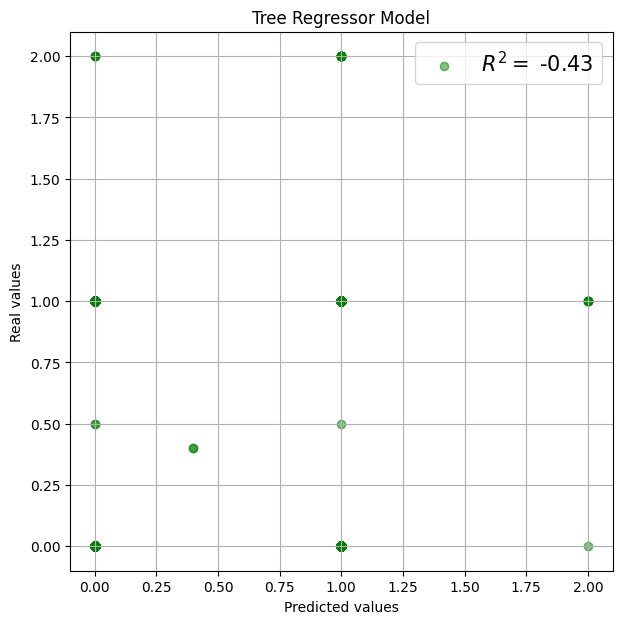

In [33]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gym_heating,39605.0,0.205277,0.406939,0.00000,0.00000,0.000000,0.000000,2.000000
Graz Temperature [2 m elevation corrected],39605.0,11.738588,9.062119,-8.69863,3.52137,11.821370,19.391370,32.621372
Graz Shortwave Radiation,39605.0,157.898718,221.420788,0.00000,0.00000,13.795000,279.460000,901.570000
Graz Direct Shortwave Radiation,39605.0,93.897102,144.173639,-6.14830,0.00000,3.675384,156.358585,612.543100
Graz Diffuse Shortwave Radiation,39605.0,64.001615,83.208253,0.00000,0.00000,6.621481,126.277370,301.075260
Graz Relative Humidity [2 m],39605.0,63.809077,14.705589,24.00000,53.00000,63.000000,74.000000,98.000000
is_schoolday,39605.0,0.513849,0.499814,0.00000,0.00000,1.000000,1.000000,1.000000
day,39605.0,15.984143,8.761931,1.00000,8.00000,16.000000,24.000000,31.000000
month,39605.0,6.539477,3.247397,1.00000,4.00000,7.000000,9.000000,12.000000
year,39605.0,2021.512814,0.499842,2021.00000,2021.00000,2022.000000,2022.000000,2022.000000


In [35]:
test_df = X_test
test_df['gym_heating_pred'] = DTRPred
test_df['gym_heating_real'] = y_test

In [36]:
test_df

,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,hour,gym_heating_pred,gym_heating_real
32128,4.471370,194.020,106.979740,87.040270,55.00,0,14,5,16,0.0,0.0
21385,25.906370,331.080,198.166172,132.913837,46.50,0,22,1,18,0.0,1.0
2992,4.031370,0.000,0.000000,0.000000,68.00,0,15,7,4,0.0,0.0
18586,25.701370,804.115,554.803085,249.311900,40.50,0,24,12,14,0.0,0.0
19111,19.656371,0.000,0.000000,0.000000,57.00,0,30,12,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35625,0.268870,0.000,0.000000,0.000000,55.00,1,20,6,2,0.0,0.0
33977,4.381370,0.000,0.000000,0.000000,70.25,1,2,6,22,0.0,0.0
22571,22.251370,0.000,0.000000,0.000000,52.75,1,4,2,3,0.0,0.0
2865,6.828870,0.000,0.000000,0.000000,67.00,0,13,7,20,0.0,0.0
